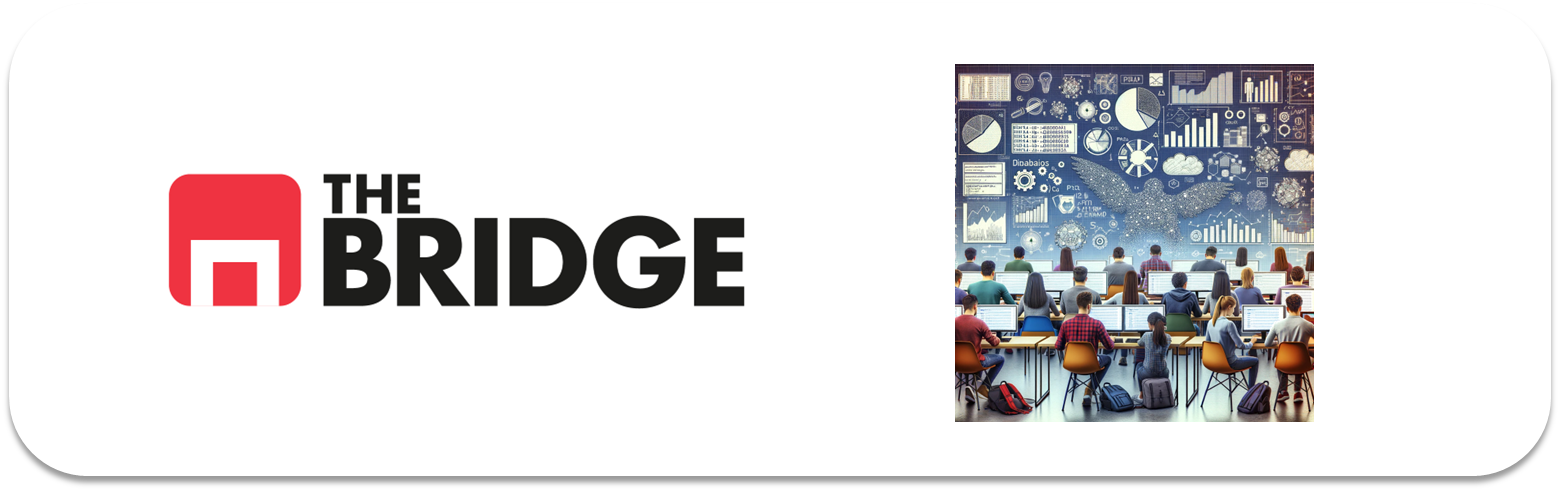

## PRACTICA OBLIGATORIA: **Clasificacion y Regresion Logistica**

* La práctica obligatoria de esta unidad consiste en modelar la supervivencia en el Titanic, por fin, además de una parte adicional multiclase. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import bootcampviztools as bvt

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression, Ridge, RidgeClassifier, ElasticNet, Lasso
from sklearn import metrics

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión logística, evaluarlo contra un dataset de test reservado del original mostrando las métricas propias de los problemas de clasificación, la matriz de confusión y la curva ROC. Además se pide comparar las predicciones con los valores reales y al final adaptar el modelo a un problema multiclase.

Los pasos para guiar el trabajo:
1. Carga el dataset del Titanic. 
2. Deshazte de las variables que no vayas a usar. Limpia lo que creas necesarios pero no hagas imputaciones.
3. Escoge y analiza la variable target de forma gráfica y razona sobre el impacto de la distribución en los resultados esperados. Ten en cuenta que lo que queremos es poder predecir si un pasajero sobrevivirá.
4. Haz el split en train y test que creas conveniente pero asegurándote que ambos conjuntos tienen un reparto similar de pasajeros embarcados en las tres ciudades.
5. Construye las parejas X,y de train y test.
6. Ahora sí imputa los nulos con medias y modas en la X de train. Guarda esas medias que necesitarás en la parte de test.
7. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
8. Trata las variables para que funcionen lo mejor posible en el modelo.
9. Construye un modelo de regresión logística.
10. EXTRA: Analiza si lo crees conveniente los pesos y la importancia de las features.
11. Procesa el dataset de Test para que puedas usarlo en la evaluación 
12. Evalúa tu modelo contra el dataset de test y train. Obten las matrices de confusión y las métricas que creas adecuadas. Haz un pequeño assesment de su generabilidad.
13. EXTRA: Halla la probabilidad de supervivencia de un hombre de entre 30 y 40 años, que embarcó en Southampton en segunda clase, viajaba solo y no pagó el billete. PISTA: En este caso tendrás que calcular varias probabilidades y hacer la media de ellas.
14. EXTRA: Aprovecha todo el trabajo haciendo un único cambio en el target, ahora será la clase del viajero. Cambia el target quitándolo de X_train, X_test y añade a estos el target anterior. El resto no deberías cambiarlo. Entrena y evalua el modelo sólo con el classification_report.  



In [2]:
df = pd.read_csv('./data/titanic.csv')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [ ]:
col_rep = {"alive", "embark_town", "class"} 
columns_to_drop = {"deck"} | col_rep  
df.drop(columns=columns_to_drop.intersection(df.columns), inplace=True) 
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,alone
0,0,3,male,22.0,1,0,7.2500,S,man,True,False
1,1,1,female,38.0,1,0,71.2833,C,woman,False,False
2,1,3,female,26.0,0,0,7.9250,S,woman,False,True
3,1,1,female,35.0,1,0,53.1000,S,woman,False,False
4,0,3,male,35.0,0,0,8.0500,S,man,True,True


In [5]:
df.update(df.select_dtypes(include=['object', 'string']).apply(lambda x: x.str.strip()))


In [6]:
df.isna().sum()

survived        0
pclass          0
sex             0
age           177
sibsp           0
parch           0
fare            0
embarked        2
who             0
adult_male      0
alone           0
dtype: int64

3. Escoge y analiza la variable target de forma gráfica y razona sobre el impacto de la distribución en los resultados esperados. Ten en cuenta que lo que queremos es poder predecir si un pasajero sobrevivirá.

<Axes: xlabel='survived', ylabel='count'>

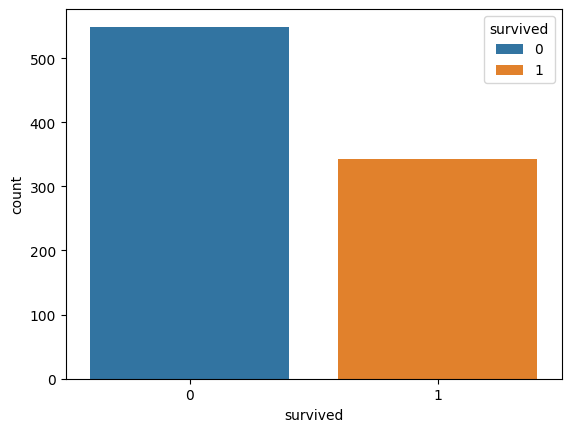

In [7]:
target = df["survived"]
sns.countplot(df, x='survived', hue='survived')

4. Haz el split en train y test que creas conveniente pero asegurándote que ambos conjuntos tienen un reparto similar de pasajeros embarcados en las tres ciudades.

In [8]:
df['embarked'] = df['embarked'].fillna(df['embarked'].mode().iloc[0])

train_set, test_set = train_test_split(df, test_size=0.2, stratify=df[['embarked']], random_state=42)


In [9]:
train_set["embarked"].value_counts() / len(train_set)


embarked
S    0.724719
C    0.188202
Q    0.087079
Name: count, dtype: float64

5. Construye las parejas X,y de train y test.

In [10]:
X_train = train_set.drop(columns=['embarked'])
y_train = train_set['embarked']

X_test = test_set.drop(columns=['embarked'])
y_test = test_set['embarked']


6. Ahora sí imputa los nulos con medias y modas en la X de train. Guarda esas medias que necesitarás en la parte de test.

In [ ]:
# Función para imputar valores nulos en la columna "age" con la edad media de cada grupo
def imputar_edad_por_grupo(df):
    df["age"] = df["age"].fillna(df.groupby("who")["age"].transform("mean"))
    return df

# Aplicamos la función a los conjuntos de entrenamiento y prueba
train_set = imputar_edad_por_grupo(train_set)
test_set = imputar_edad_por_grupo(test_set)


In [ ]:
test_set.isna().sum()

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
who           0
adult_male    0
alone         0
dtype: int64

In [ ]:
# Función para crear la columna "family" y eliminar "sibsp" y "parch"
def agregar_columna_familia(df):
    return df.assign(family=df["sibsp"] + df["parch"]).drop(columns=["sibsp", "parch"])

# Aplicamos la función a los conjuntos de entrenamiento y prueba
train_set = agregar_columna_familia(train_set)
test_set = agregar_columna_familia(test_set)


In [ ]:
# Contar y eliminar duplicados en test_set
num_duplicados = test_set.duplicated().sum()
print(f"{num_duplicados} valores duplicados en el test set")

test_set = test_set.drop_duplicates()

# Contar duplicados y valores nulos después de la limpieza
num_duplicados_despues = test_set.duplicated().sum()
num_nulos = test_set.isna().sum().sum()

print(f"{num_duplicados_despues} duplicados en el test set")
print(f"{num_nulos} valores nulos en el test set")


5 valores duplicados en el test set
0 duplicados en el test set
0 valores nulos en el test set


In [ ]:
# Contar valores duplicados antes de eliminarlos
duplicados_antes = train_set.duplicated().sum()
print(f"{duplicados_antes} valores duplicados en el train set")

# Eliminar duplicados
train_set = train_set.drop_duplicates()

# Contar valores duplicados y nulos después de la limpieza
duplicados_despues = train_set.duplicated().sum()
valores_nulos = train_set.isna().sum().sum()

print(f"{duplicados_despues} duplicados en el train set")
print(f"{valores_nulos} valores nulos en el train set")


89 valores duplicados en el train set
0 duplicados en el train set
0 valores nulos en el train set


In [ ]:
features = ["survived"]

X_train, y_train = train_set.drop(columns=features), train_set[features[0]]
X_test, y_test = test_set.drop(columns=features), test_set[features[0]]


7. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.

In [17]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 623 entries, 838 to 571
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pclass      623 non-null    int64  
 1   sex         623 non-null    object 
 2   age         623 non-null    float64
 3   fare        623 non-null    float64
 4   embarked    623 non-null    object 
 5   who         623 non-null    object 
 6   adult_male  623 non-null    bool   
 7   alone       623 non-null    bool   
 8   family      623 non-null    int64  
dtypes: bool(2), float64(2), int64(2), object(3)
memory usage: 40.2+ KB


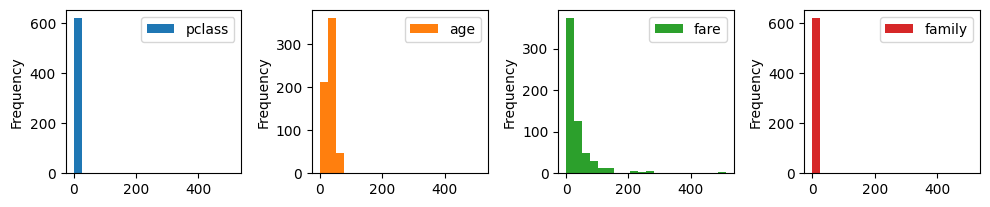

In [19]:
X_train.plot.hist(bins=20, figsize=(10, 8), layout=(4, 4), subplots=True)
plt.tight_layout()


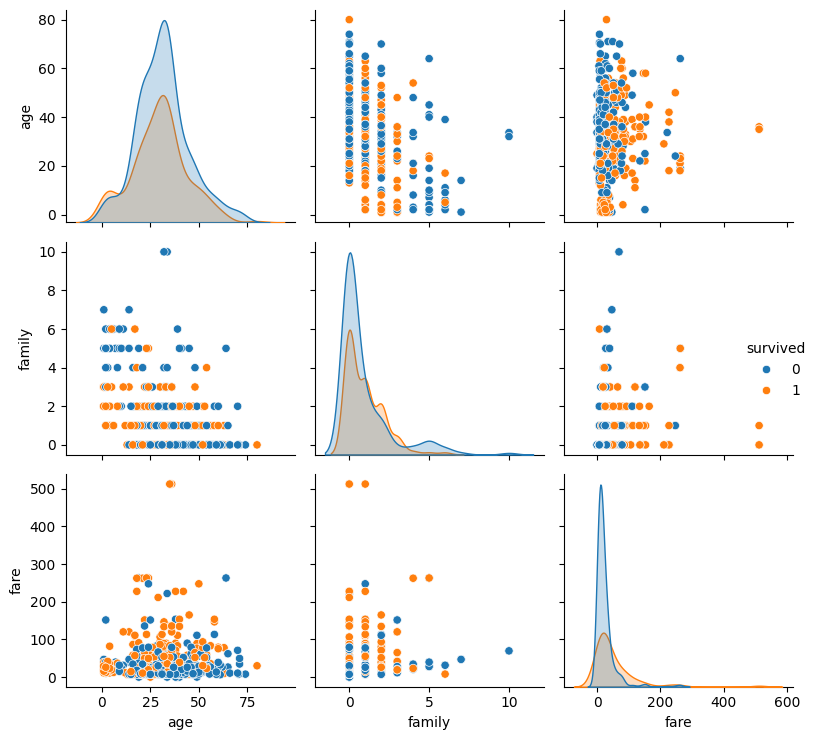

In [ ]:
feat_num = ['age', 'family', 'fare']


X_train_with_target = pd.concat([X_train[feat_num], y_train], axis=1)
X_train_with_target.columns = feat_num + ['survived']


sns.pairplot(X_train_with_target, hue='survived')

plt.tight_layout()
plt.show()


In [23]:
X_train.age.value_counts()


age
33.655689    58
32.008982    32
30.000000    21
24.000000    20
18.000000    20
             ..
70.500000     1
55.500000     1
66.000000     1
36.500000     1
53.000000     1
Name: count, Length: 85, dtype: int64

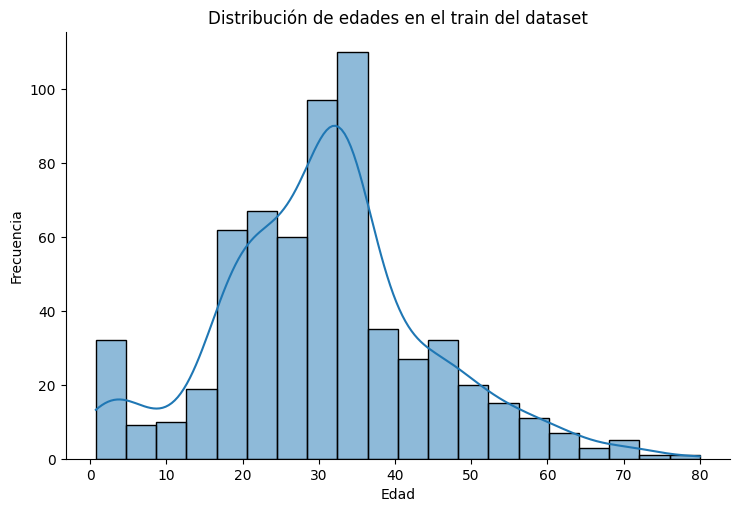

In [24]:
sns.displot(X_train['age'], bins=20, kde=True, aspect=1.5)
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de edades en el train del dataset')
plt.show()


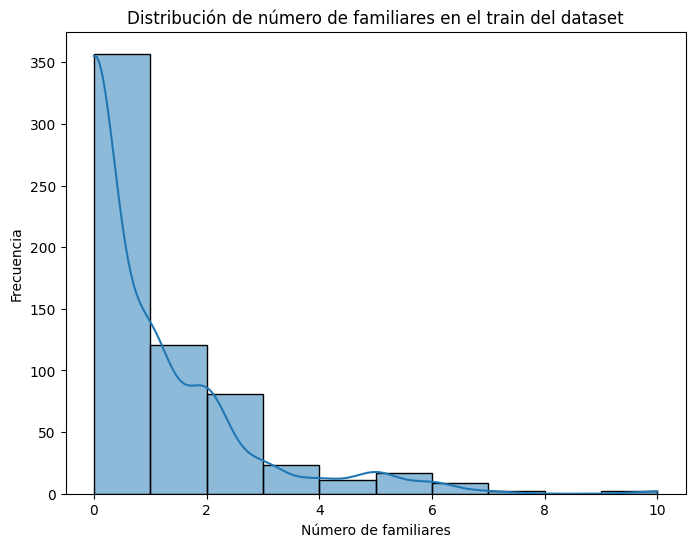

In [25]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(X_train['family'], bins=10, kde=True, ax=ax)
ax.set_xlabel('Número de familiares')
ax.set_ylabel('Frecuencia')
ax.set_title('Distribución de número de familiares en el train del dataset')
plt.show()


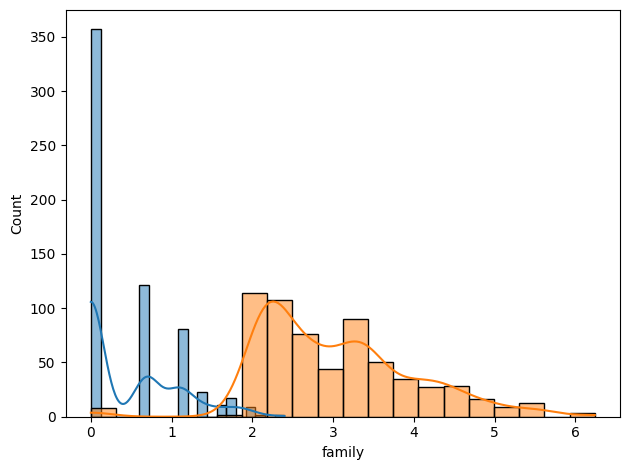

In [27]:
# Definir las características a transformar
features_transform = ['family', 'fare']

# Aplicar la transformación logarítmica usando np.log1p de forma vectorizada
X_train[features_transform] = X_train[features_transform].apply(np.log1p)

# Usar sns.histplot para graficar las distribuciones de las columnas transformadas
X_train[features_transform].apply(lambda x: sns.histplot(x, kde=True, bins=20))

plt.tight_layout()
plt.show()


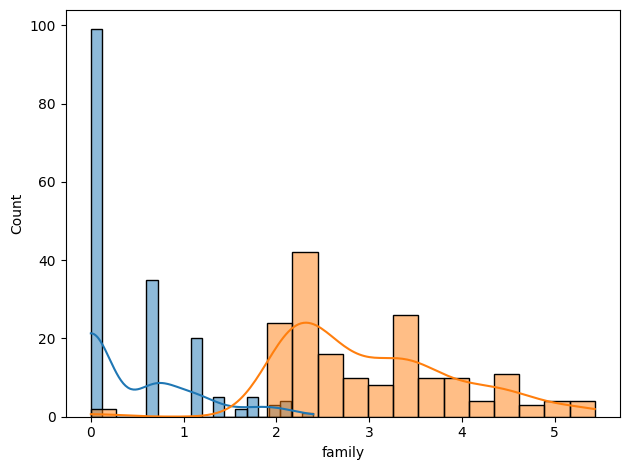

In [28]:
# Aplicar la transformación logarítmica de forma vectorizada
X_test[features_transform] = X_test[features_transform].apply(np.log1p)

# Usar sns.histplot para graficar las distribuciones de las columnas transformadas
for feature in features_transform:
    sns.histplot(X_test[feature], kde=True, bins=20)

plt.tight_layout()
plt.show()


In [32]:
feat_cat = ['pclass', 'sex', 'who', 'adult_male', 'embarked', 'alone']

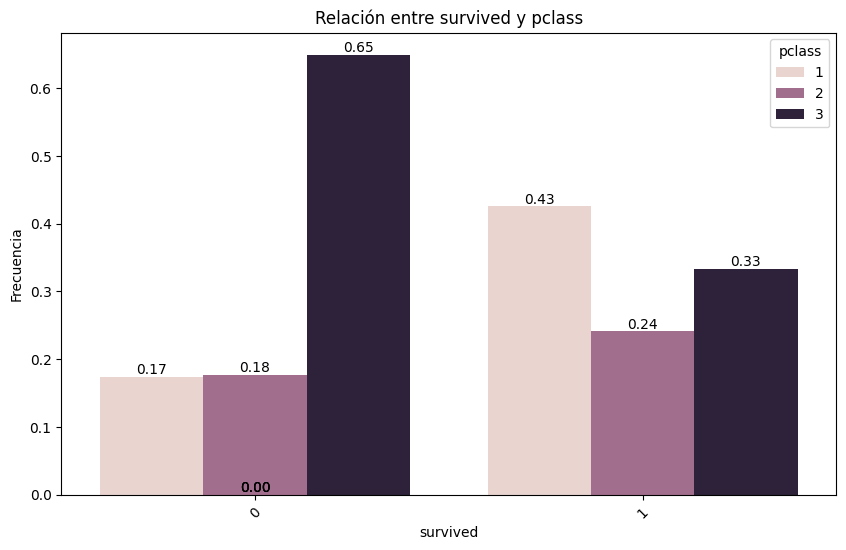

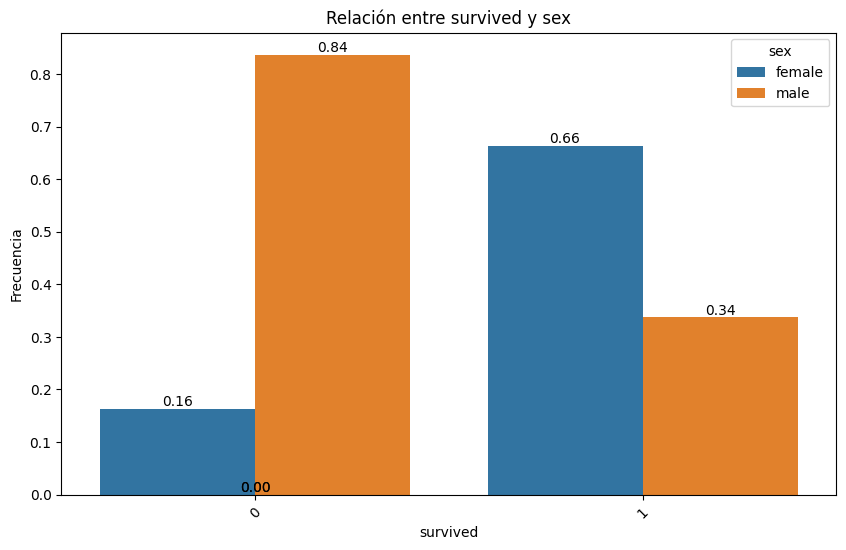

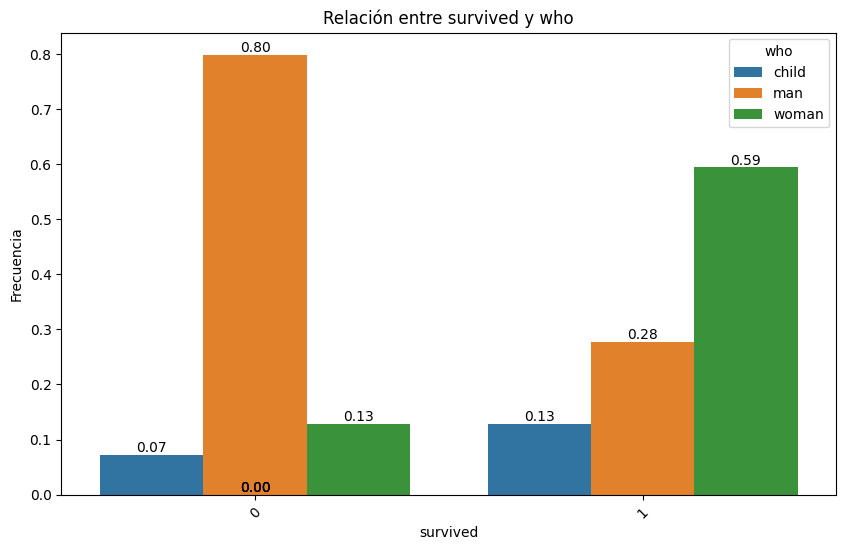

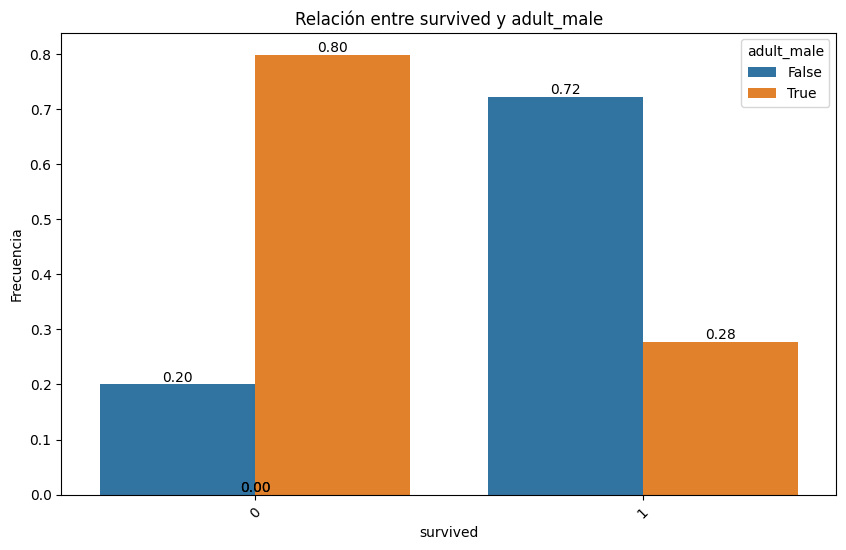

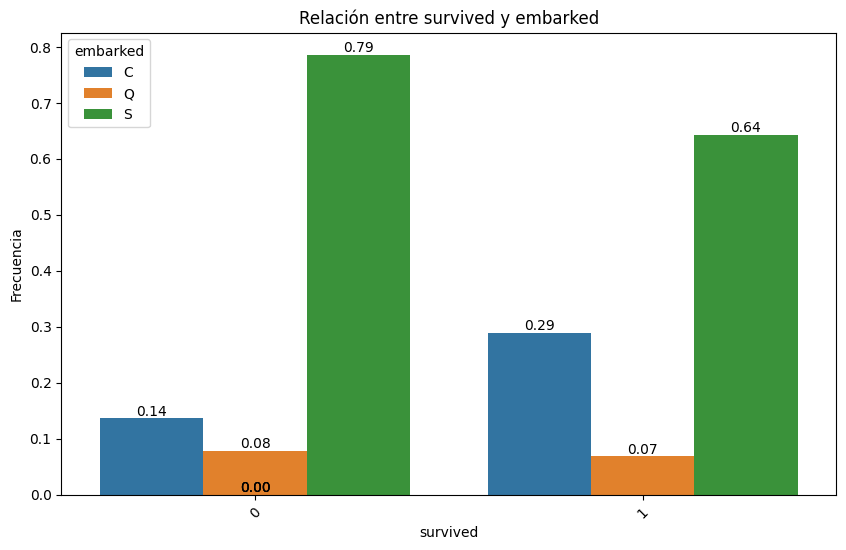

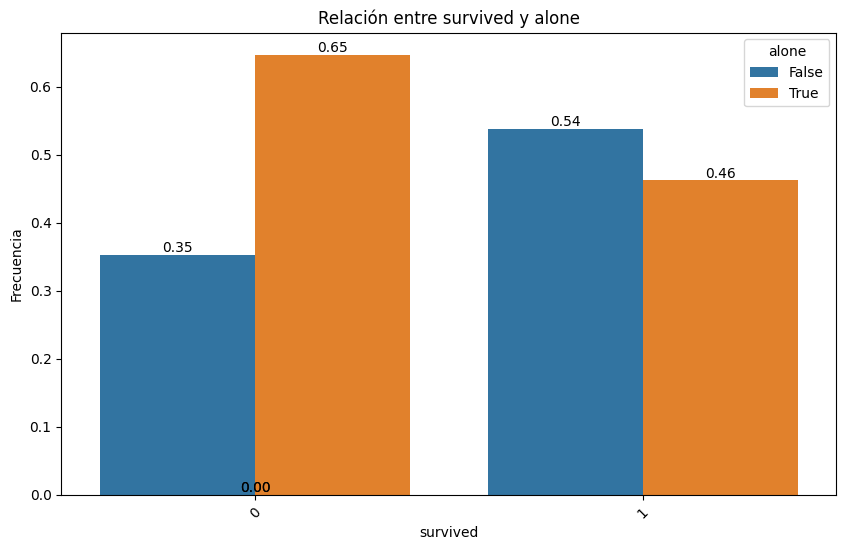

In [33]:
# Función para visualizar la relación categórica de una manera más modular
def plot_categorical_relationship(df, target, features, show_values=True, relative_freq=True):
    for feat in features:
        bvt.plot_categorical_relationship_fin(df, target, feat, show_values=show_values, relative_freq=relative_freq)

# Llamada a la función con las características categóricas
plot_categorical_relationship(train_set, "survived", feat_cat)


In [34]:
X_train.columns.to_list()

['pclass',
 'sex',
 'age',
 'fare',
 'embarked',
 'who',
 'adult_male',
 'alone',
 'family']

In [ ]:
X_train, X_test = X_train.drop(columns=['adult_male']), X_test.drop(columns=['adult_male'])


In [36]:
X_train.columns.to_list()

['pclass', 'sex', 'age', 'fare', 'embarked', 'who', 'alone', 'family']

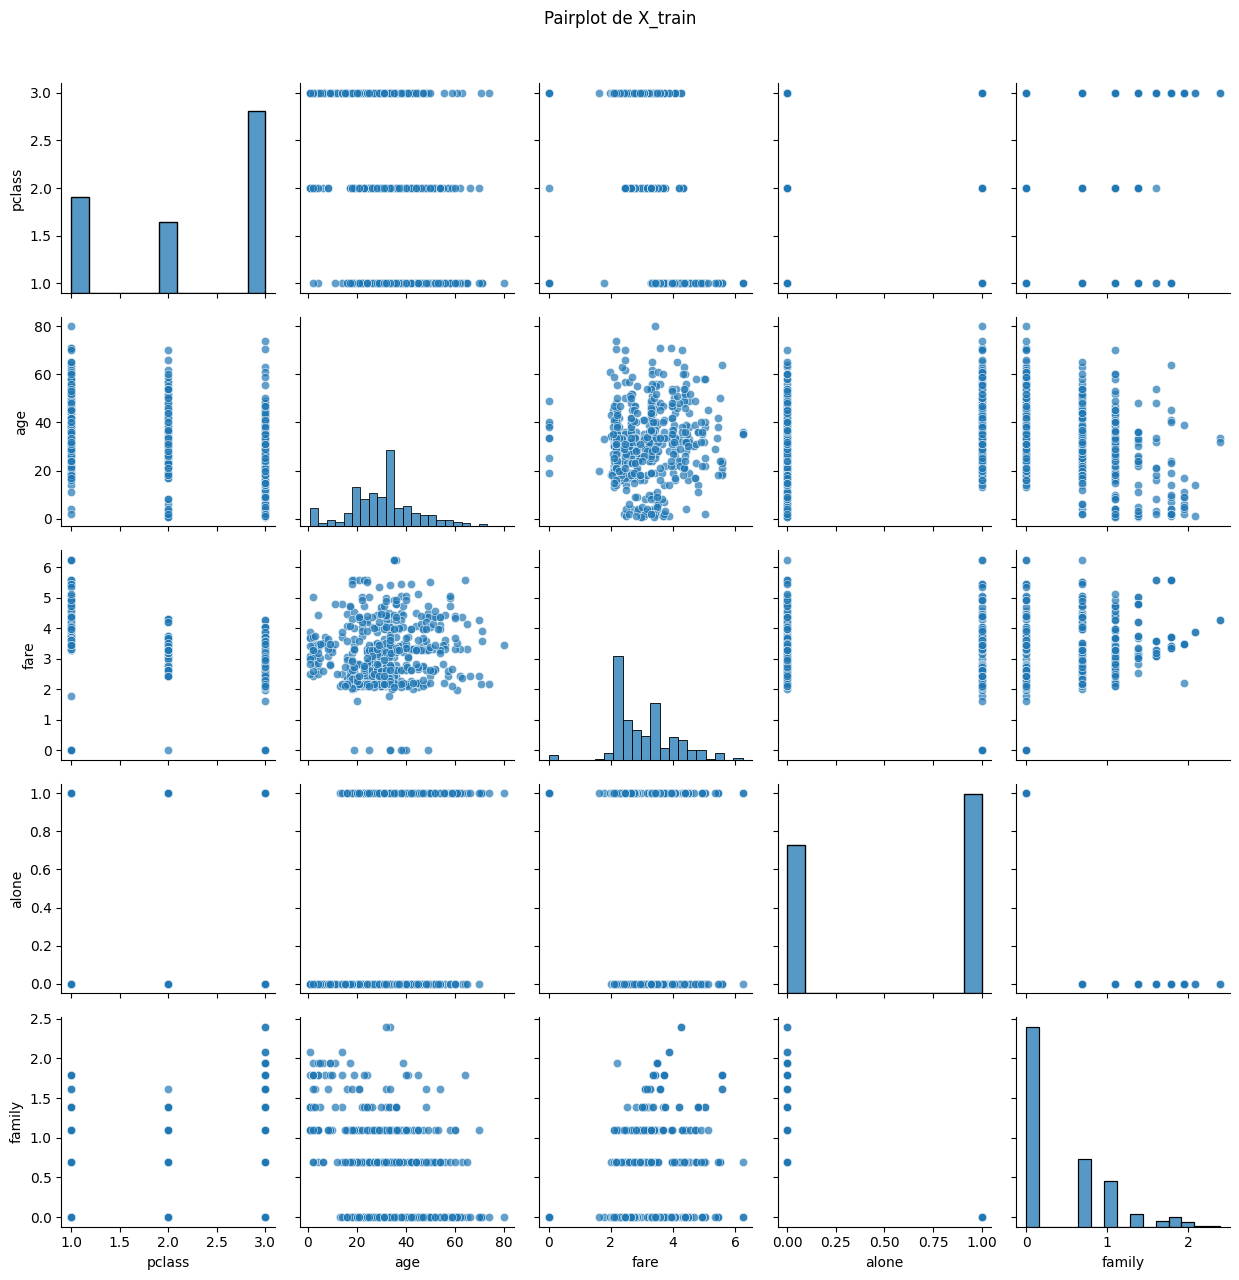

In [37]:
sns.pairplot(X_train, kind='scatter', plot_kws={'alpha': 0.7})
plt.suptitle('Pairplot de X_train', y=1.02)  # Agregar título
plt.tight_layout()
plt.show()


In [39]:
# Seleccionar solo las columnas numéricas de X_train
numeric_cols = X_train.select_dtypes(include=['number']).columns

# Calcular la correlación de cada columna numérica de X_train con y_train
correlations = X_train[numeric_cols].apply(lambda col: col.corr(y_train))

# Mostrar las correlaciones absolutas ordenadas de mayor a menor
correlations.abs().sort_values(ascending=False)


pclass    0.324514
fare      0.313785
family    0.101140
age       0.067490
dtype: float64

8. Trata las variables para que funcionen lo mejor posible en el modelo.

In [40]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Definir el transformador de columnas
column_transformer = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(), ['who', 'embarked'])
    ], 
    remainder='passthrough'  # Deja el resto de las columnas sin cambios
)

# Aplicar la transformación a X_train y X_test
X_train = column_transformer.fit_transform(X_train)
X_test = column_transformer.transform(X_test)

# Convertir el resultado a DataFrame para mantener las etiquetas de las columnas
X_train = pd.DataFrame(X_train, columns=column_transformer.get_feature_names_out())
X_test = pd.DataFrame(X_test, columns=column_transformer.get_feature_names_out())


In [42]:
print(X_train.columns)


Index(['encoder__who_child', 'encoder__who_man', 'encoder__who_woman',
       'encoder__embarked_C', 'encoder__embarked_Q', 'encoder__embarked_S',
       'remainder__pclass', 'remainder__sex', 'remainder__age',
       'remainder__fare', 'remainder__alone', 'remainder__family'],
      dtype='object')


In [43]:
# Transformar la columna 'remainder__alone' en binaria usando map
X_train['remainder__alone'] = X_train['remainder__alone'].map({'yes': 1, 'no': 0})
X_test['remainder__alone'] = X_test['remainder__alone'].map({'yes': 1, 'no': 0})

# Transformar la columna 'remainder__sex' en binaria usando map
X_train['remainder__sex'] = X_train['remainder__sex'].map({'male': 1, 'female': 0})
X_test['remainder__sex'] = X_test['remainder__sex'].map({'male': 1, 'female': 0})



In [44]:
X_train.head()

,encoder__who_child,encoder__who_man,encoder__who_woman,encoder__embarked_C,encoder__embarked_Q,encoder__embarked_S,remainder__pclass,remainder__sex,remainder__age,remainder__fare,remainder__alone,remainder__family
0,0.0,1.0,0.0,0.0,0.0,1.0,3,1,32.0,4.051712,NaN,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,1,1,42.0,3.980694,NaN,0.693147
2,0.0,1.0,0.0,0.0,0.0,1.0,3,1,16.0,2.351375,NaN,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,1,0,63.0,4.36892,NaN,0.693147
4,0.0,1.0,0.0,0.0,0.0,1.0,2,1,42.0,3.332205,NaN,0.693147


In [45]:
# Identificar las columnas booleanas
bool_cols_train = X_train.select_dtypes(include=['bool']).columns
bool_cols_test = X_test.select_dtypes(include=['bool']).columns

# Convertirlas a int
X_train[bool_cols_train] = X_train[bool_cols_train].astype(int)
X_test[bool_cols_test] = X_test[bool_cols_test].astype(int)

In [46]:
X_train.head()

,encoder__who_child,encoder__who_man,encoder__who_woman,encoder__embarked_C,encoder__embarked_Q,encoder__embarked_S,remainder__pclass,remainder__sex,remainder__age,remainder__fare,remainder__alone,remainder__family
0,0.0,1.0,0.0,0.0,0.0,1.0,3,1,32.0,4.051712,NaN,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,1,1,42.0,3.980694,NaN,0.693147
2,0.0,1.0,0.0,0.0,0.0,1.0,3,1,16.0,2.351375,NaN,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,1,0,63.0,4.36892,NaN,0.693147
4,0.0,1.0,0.0,0.0,0.0,1.0,2,1,42.0,3.332205,NaN,0.693147


In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Ajuste y transformación en el conjunto de entrenamiento
X_train[feat_num] = scaler.fit_transform(X_train[feat_num])

# Solo transformación en el conjunto de prueba
X_test[feat_num] = scaler.transform(X_test[feat_num])



KeyError: "None of [Index(['age', 'family', 'fare'], dtype='object')] are in the [columns]"